# PREDICTIVE ANALYSIS OF HOME LOCATION

In [1]:
#IMPORTATION OF MODULES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [28]:
#IMPORTATION OF DATASETS

train1=pd.read_csv(r'C:\train.csv')
test1=pd.read_csv(r'C:\test.csv')

In [3]:
#CONVERTING IN SERIES

y=train1['SalePrice'].to_numpy()
y=pd.Series(y)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


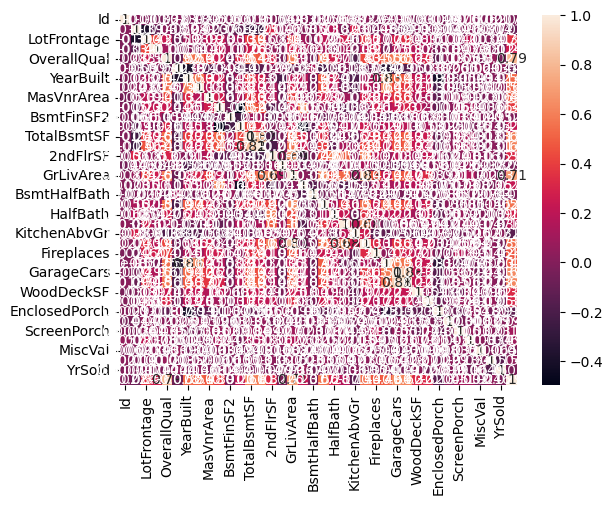

In [185]:
#COLUMNS INFORMATIONS ABOUT DATAFRAME

train1.info()

#CORRELATION BETWEEN VARIABLES
corr=train1.corr()


#CORRELATION MATRIX

#1-fig=plt.figure()
#ax=fig.add_subplot(111)
#cax=ax.matshow(corr, vmin=-1, vmax=1)
#fig.colorbar(cax)
#ticks=np.arange(0,81,1)
#ax.set_xticks(ticks)
#ax.set_yticks(ticks)
#ax.set_xticklabels(train1.columns.values)
#ax.set_yticklabels(train1.columns.values)
#plt.show()

ax=sns.heatmap(corr, annot=True)

#TO HAVE LIST OF COLUMNS NAMES VALUES
colNames=train1.columns.values

corr

In [186]:
#GET THE TOP X FEATURES THAT HAS THE HIGHEST CORRELATION

print(corr.nlargest(37, 'SalePrice').index)
print(corr.nlargest(37, 'SalePrice').values[:, 37])

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch'],
      dtype='object')
[ 1.          0.7909816   0.70862448  0.6404092   0.62343144  0.61358055
  0.60585218  0.56066376  0.53372316  0.52289733  0.50710097  0.48636168
  0.47749305  0.46692884  0.38641981  0.3517991   0.32441344  0.3193338
  0.31585623  0.28410768  0.26384335  0.22712223  0.21447911  0.16821315
  0.11144657  0.09240355  0.04643225  0.04458367 -0.01137812 -0.01684415
 -0.02118958 -0.02191672 -0.02560613 -0.02892259 -0.07

In [4]:

train=train1.drop('SalePrice', axis=1)

#SELECTION OF COLUMNS WHO INCLUDE FLOAT OR INT DATAS
train=train.select_dtypes(include=['float64','int64'])
train.head()

# DATAS WHO INCLUDE NAN VALUES :LotFrontage 259,,,MasVnrArea 8,,,GarageYrBlt 81,,,
m1=train['LotFrontage'].mean()
train['LotFrontage'].fillna(value=m1, inplace=True)
m2=train['MasVnrArea'].mean()
train['MasVnrArea'].fillna(value=m2, inplace=True)
m3=train['GarageYrBlt'].mean()
train['GarageYrBlt'].fillna(value=m3, inplace=True)

#CHECKING OF MISSING OR NAN VALUES
train.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [105]:
#DESCRIPTION OF THE TARGET OR DEPENDANT VALUE
train1['SalePrice'].describe()

#INTERQUARTILE RANGE EVALUATION TO CHECK EVENTUALS OUTLIERS
def outliers_iqr(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    z_scores=[(y-mean)/std for y in data]
    return np.where(np.abs(z_scores)>threshold)
for i in outliers_iqr(train1.SalePrice)[0]:
    print(train1[i:i+1])
print()

    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
58  59          60       RL         66.0    13682   Pave   NaN      IR2   

   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
58         HLS    AllPub  ...        0    NaN   NaN         NaN       0   

   MoSold YrSold  SaleType  SaleCondition  SalePrice  
58     10   2006       New        Partial     438780  

[1 rows x 81 columns]
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
178  179          20       RL         63.0    17423   Pave   NaN      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
178         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
178      7   2009       New        Partial     501837  

[1 rows x 81 columns]
      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
185  186          75       RM         90.0   

<AxesSubplot:>

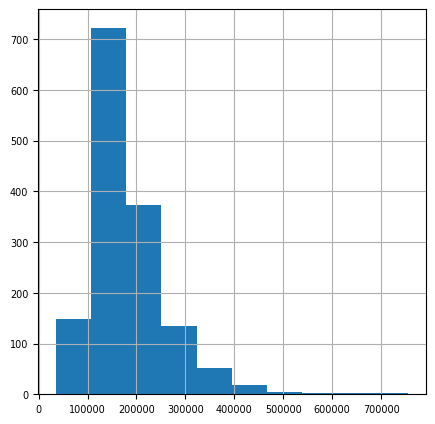

In [106]:
y.hist(figsize=(5,5), bins=10, xlabelsize=7, ylabelsize=7)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

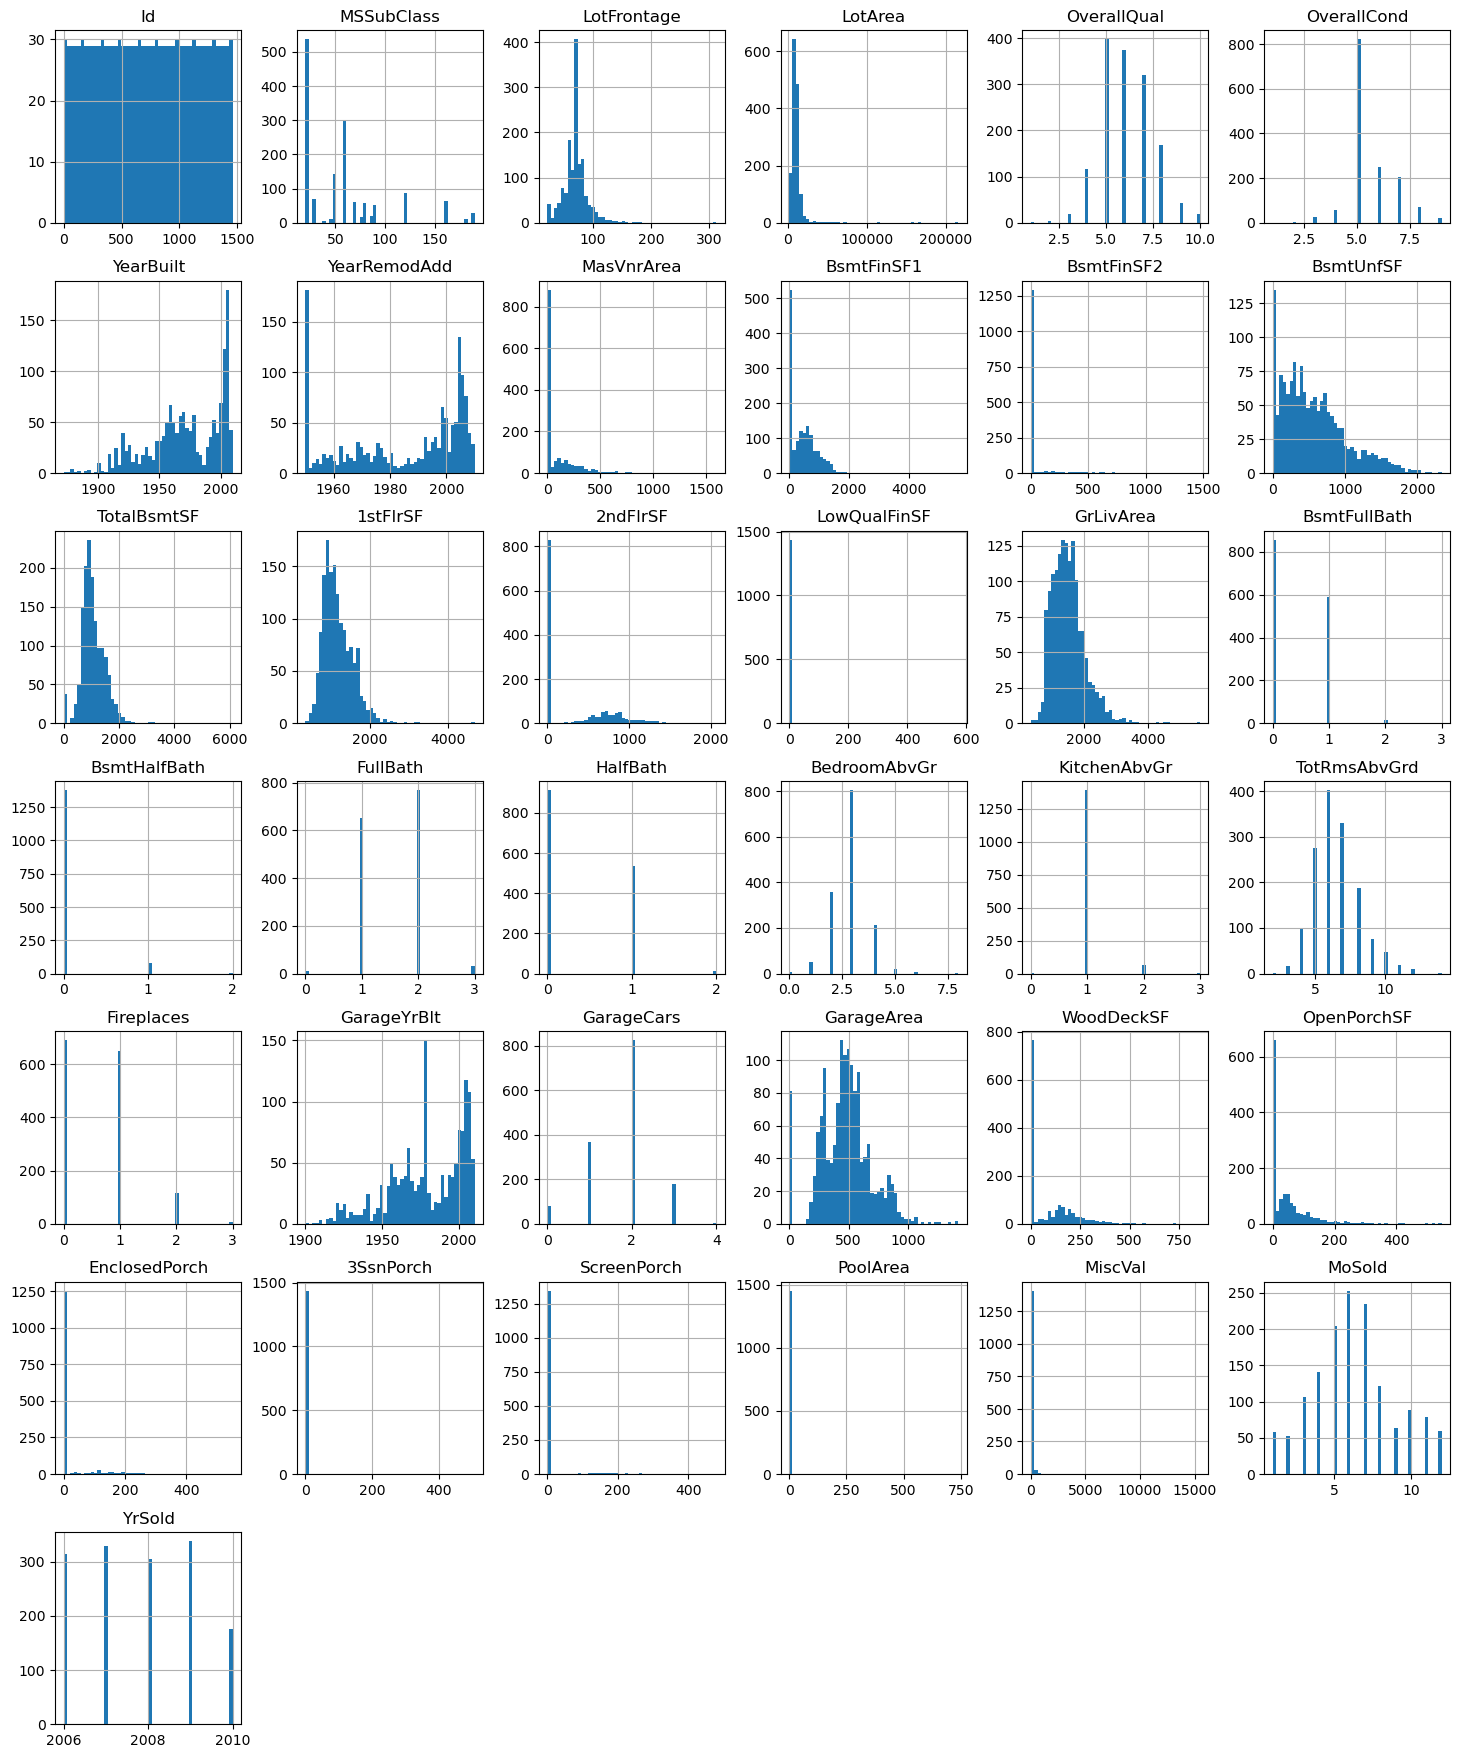

In [107]:
train.hist(figsize=(18, 22), bins=50, xlabelsize=10, ylabelsize=10)

Text(0, 0.5, 'sale price')

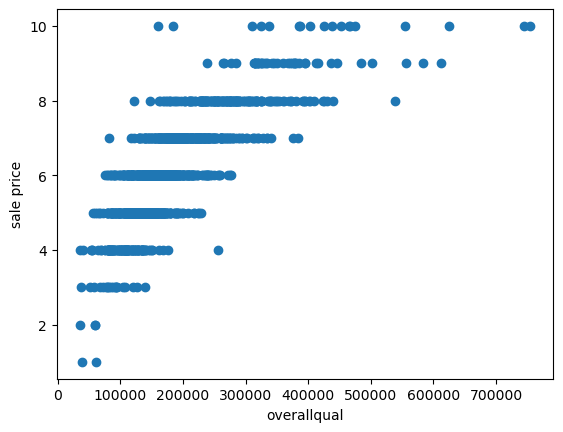

In [108]:
plt.scatter(y, train['OverallQual'], marker='o')
plt.xlabel('overallqual')
plt.ylabel('sale price')


Text(0, 0.5, 'sale price')

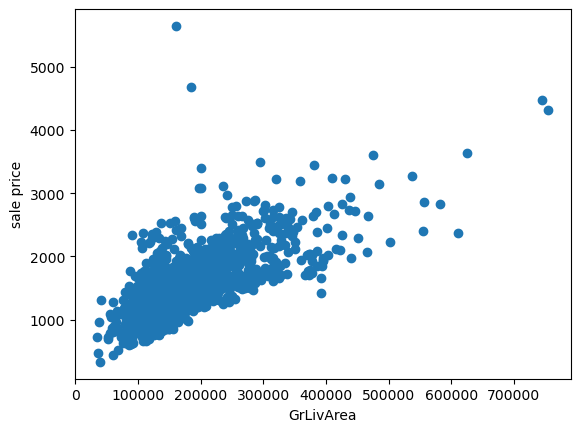

In [109]:
plt.scatter(y, train['GrLivArea'], marker='o')
plt.xlabel('GrLivArea')
plt.ylabel('sale price')

In [42]:
#1-SPLITTING OF DATASETS for the model with all variables

xtrain, xtest, ytrain, ytest =train_test_split(train,y, train_size=0.8)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
#LINEAR REGRESSION WITH ALL MODEL VARIABLES

regr=LinearRegression()
regr.fit(xtrain, ytrain)
regr.score(xtest, ytest)

0.8601818685033072

In [45]:
#2-TRY REGRESSION WITH THE MORE CORRELATED DEPENDANTS VARIABLES BY CREATION OF THEIR SPECIFIC DATAFRAME

trainY=pd.DataFrame(np.c_[train['OverallQual'],train['GrLivArea']], columns=['OverallQual','GrLivArea'])
trainY
#3- NEW DF SPLITTING
x__train, x__test, y__train ,y__test=train_test_split(trainY, y, train_size=0.8)

In [46]:
#2nd model with 2highest correlated variables REGRESSION
regr.fit(x__train, y__train)
regr.score(x__test, y__test)

0.750577215737334

In [24]:
y_hat=regr.predict(x__test)

The best model was whose got a better accuracy for prediction

Text(0, 0.5, 'predicted prices')

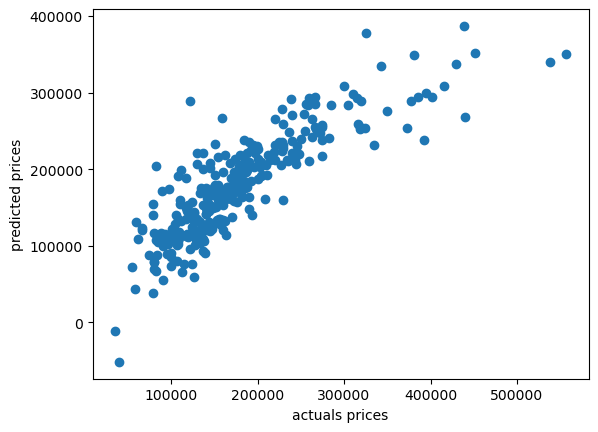

In [25]:
plt.scatter(y__test, y_hat)
plt.xlabel("actuals prices")
plt.ylabel('predicted prices')